In [1]:
""" Introduction
Relative Strenght Index is a momentum indicator

Considering a 14 period RSI, then above 70% the asset is considered to be overbought
therefor it is indicated that the price may decrease, whereas below 30% it is 
considered to be oversold, indicating that the price may rise.

Considering the data used the 14 period RSI is referring to 14 days.

This script aims to create a smooth visualisation of the RSI indicator as 

"""

' Introduction\nRelative Strenght Index is a momentum indicator\n\nConsidering a 14 period RSI, then above 70% the asset is considered to be overbought\ntherefor it is indicated that the price may decrease, whereas below 30% it is \nconsidered to be oversold, indicating that the price may rise.\n\nConsidering the data used the 14 period RSI is referring to 14 days.\n\nThis script aims to create a smooth visualisation of the RSI indicator against Tesla Stock\n\n'

In [2]:
# The old friends
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.axes

# The finance friends
import pandas_ta as ta
import yfinance as yf

# Time manipulation
import datetime

# Colors manipulation
from colour import Color

In [3]:
""" 1. Create a function for data subsetting """
def subset_df (tickers, start_date, end_date):   
    df = pd.DataFrame()

    # 1.1. Populate the data frame
    df = df.ta.ticker(tickers)
    df["Date"] = df.index

    # 1.2. Add the column date for subsetting
    df_subsetted = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]
    price_df = pd.DataFrame(df_subsetted["Close"])
    
    rsi_df = df_subsetted.ta.rsi()
    name = "RSI " + tickers
    rsi_df = rsi_df.rename(name)
    rsi_df = pd.DataFrame(rsi_df)
    
    return (rsi_df,price_df)
""" 2. Create function to define the tick marks frequency on the plot """
def x_interval (data_frame, range_parameter = "M"):
    """ run this function with df from subset_df and range parameter (d,m,y)
    """
    x = data_frame.index.to_numpy(dtype = object)
    x_axis = []
    month = 0 # There is no month 0, therefore the first value is always placed
    
    for date in range(0, len(x)):
        if range_parameter == "M":
            if date == 0:  
                prior_month = x[date].to_pydatetime().month
            else:
                month = x[date].to_pydatetime().month
        elif range_parameter == "D":
            if date == 0:  
                prior_month = x[date].to_pydatetime().day
            else:
                month = x[date].to_pydatetime().day
        elif range_parameter == "Y":
            if date == 0:  
                prior_month = x[date].to_pydatetime().year
            else:
                month = x[date].to_pydatetime().year

        if month != prior_month:
            x_axis.append(x[date])
            prior_month = month
        elif date == 0:
            x_axis.append(x[date])
        elif date == len(x):
            x_axis.append(x[date])
        else:
            pass
        
    return x_axis
""" 3. Create a function that creates a fading color gradient """
def colorFader(c1, c2, mix = 0): #fade(linear interpolate) from color c1(at mix = 0) to c2(mix = 1)
    # Sourced from: https://pretagteam.com/question/generating-color-gradient-in-python
    # Many thanks for posting this function online
    
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)       

In [4]:
""" 4. Obtain Data """
    # 4.1. Define variable
start_date = "2020-03-01"
end_date = "2021-12-03" 
tickers = "PLTR"
    # 4.2. Get the Data Frame 
asset_data = subset_df(tickers, start_date, end_date)
rsi_ind = asset_data[0]
    # 4.3. Define the range parameters
x_axis = x_interval(rsi_ind, range_parameter = "M")
y_axis = []
for x in range(0, 105,5):
    y_axis.append(x)

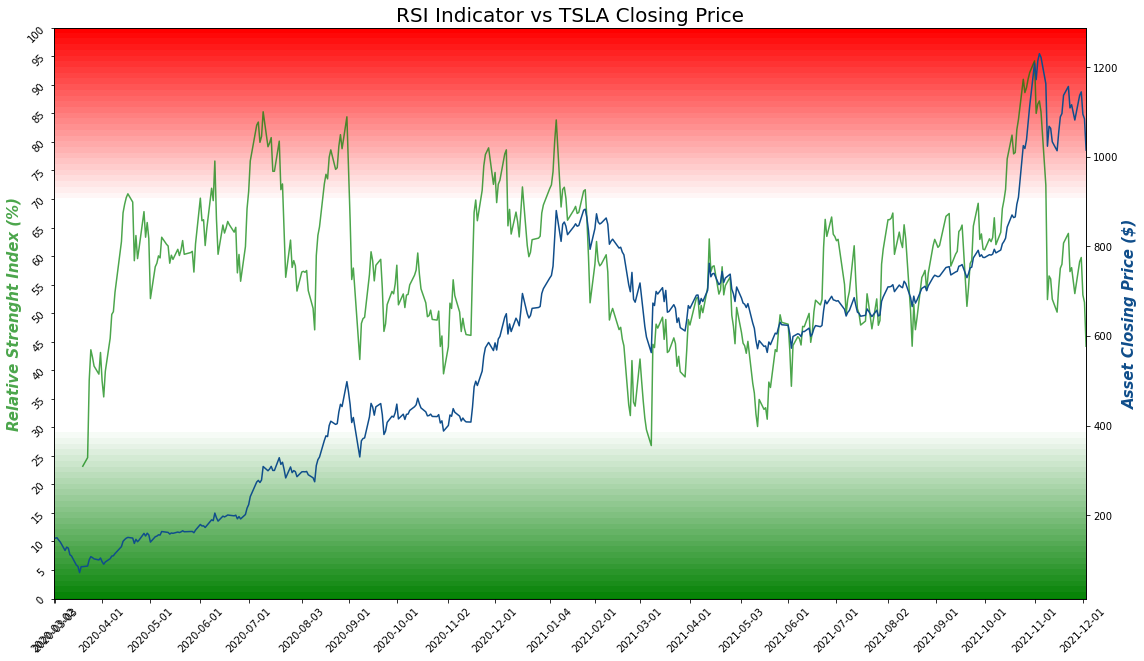

In [5]:
""" 5. Plot the data"""
fig, ax1 = plt.subplots()
    # 5.1. Red Fading
c1, c2 = 'red', "white"
n = 100
for x in range(70, n + 1,):
    ax1.axhline(x, color = colorFader(c1, c2, (100-x)/30), linewidth = 10)
    # 5.2. Green Fading
c1, c2 = 'green', "white"
n = 30
    # 5.3. Place fading bands
for x in range(0, n + 1):
    ax1.axhline(x, color = colorFader(c1, c2, x/30), linewidth = 10)
    # 5.4. Plot RSI
ax1.plot(rsi_ind, color = "green", alpha = 0.7)
plt.ylabel("Relative Strenght Index (%)", style = "italic", weight = 600, 
           color = "green", alpha = 0.7, fontsize = 15)
plt.yticks(ticks = y_axis)
plt.ylim(0,100)

    # 5.5. Plot price data
ax2 = ax1.twinx()
ax2.plot(asset_data[1]["Close"], color = "#104E8B")

    # 5.6. Adjust chart size and 2nd axis manipulation
plt.xlim(min(rsi_ind.index),max(rsi_ind.index))
ax1.tick_params(labelrotation=45)
plt.xticks(ticks = x_axis, rotation = 70)
plt.ylabel("Asset Closing Price ($)", style = "italic", weight = 600, 
           rotation = 90,color = "#104E8B", fontsize = 15)
plt.title("RSI Indicator vs " +  tickers + " Closing Price", fontsize = 20)
fig.set_size_inches(18.5, 10.5, forward = True)

plt.show()